<a href="https://colab.research.google.com/github/polis-community/red-dwarf/blob/main/docs/notebooks/polis-implementation-legacy-demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install --quiet --no-cache-dir git+https://github.com/polis-community/red-dwarf.git@main

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.1/116.1 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 181.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 144.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 142.6 MB/s eta 0:00:00


We're going to try to use this library to reproduce the visualization in this Polis report using matplotlib: https://pol.is/report/r8xhmkwp6shm9yfermteh

Note: This easy reproduction currently only works for conversations with the following features:

- < 100 participants
- no comments tags as metadata

<img src="https://imgur.com/0CGarhi.png" width="50%"/>

Included participant count: 36


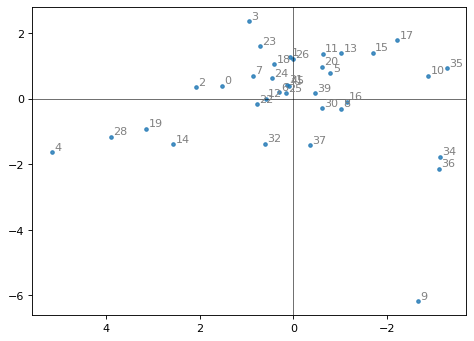

In [ ]:
from reddwarf.polis import PolisClient
from reddwarf.data_presenter import DataPresenter

client = PolisClient()
client.load_data(polis_id="r8xhmkwp6shm9yfermteh")
# Generate the raw vote matrix
client.get_matrix(is_filtered=True)
client.run_pca()
included_participant_count = client.projected_data.shape[0]
print(f"Included participant count: {included_participant_count}")

presenter = DataPresenter(client)
presenter.generate_figure(coord_dataframe=client.projected_data)

This looks good and has the right amount of participants that matches the report page.

Let's see is clusters look right.

K=2, silhouette_K=0.5359866103230353
K=3, silhouette_K=0.29292741485159585
K=4, silhouette_K=0.4634633067699528
K=5, silhouette_K=0.3117358267549188
Optimal clusters for K=2
Plotting PCA embeddings with K-means, K=2
Calculating convex hulls around clusters...
Hull 0, bounding 33 points
Hull 1, bounding 3 points


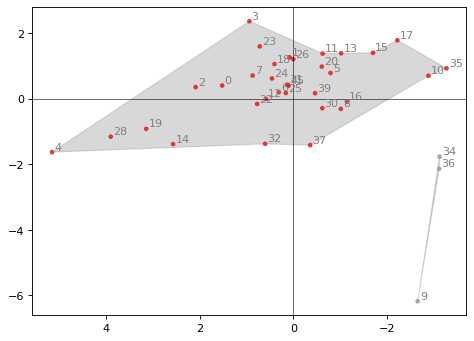

In [19]:
# This uses a random seed, and so will find slightly different things each time.
# Future iterations will need to seed cluster centers and do something that Polis platform calls "k-smoothing" to ensure matches.
client.find_optimal_k()
presenter.client = client
presenter.render_optimal_cluster_figure()